In [1]:
import cv2
import numpy as np
import os
import random
from matplotlib import pyplot

In [2]:
# open the yes and no

filepaths = {}

yes_folder = os.path.join('raw_data','yes')
no_folder = os.path.join('raw_data','no')

filepaths['yes'] = [os.path.join(yes_folder ,x)for x in next(os.walk(os.path.join(yes_folder)))[2]]
filepaths['no'] = [os.path.join(no_folder ,x)for x in next(os.walk(os.path.join(no_folder)))[2]]

filepaths['no'][0:5]

['raw_data/no/no368.jpg',
 'raw_data/no/no238.jpg',
 'raw_data/no/no835.jpg',
 'raw_data/no/no709.jpg',
 'raw_data/no/no54.jpg']

In [3]:
positives = [cv2.imread(x,0) for x in filepaths['yes']]
negatives = [cv2.imread(x,0) for x in filepaths['no']]

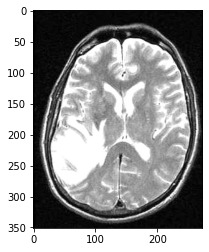

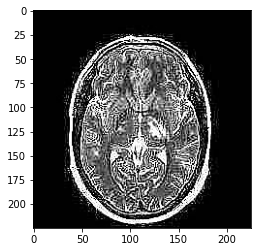

In [4]:
pyplot.imshow(positives[1], cmap='gray')
pyplot.show()
pyplot.imshow(negatives[1], cmap='gray')
pyplot.show()

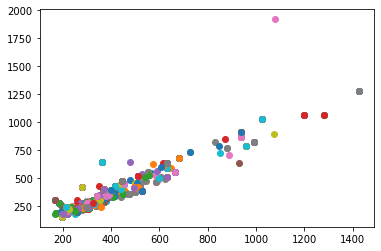

In [5]:
'''
Plot the distribution of image sizes
'''

for image in positives+negatives:
    pyplot.scatter(image.shape[0],image.shape[1])

pyplot.show()

In [6]:
'''
Find the extreme points of the brain and crop and resize to 224 x 224
'''
def process_image(image, size=(224,224)):
    
    image = cv2.GaussianBlur(image, (5,5), 0)
    thresh = cv2.threshold(image, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    c = max(contours, key = cv2.contourArea)
    
    p0 = np.min(c,axis=0)[0]
    p1 = np.max(c,axis=0)[0]
    
    return cv2.resize(image[p0[1]:p1[1], p0[0]:p1[0]], size, interpolation=cv2.INTER_CUBIC)

In [7]:
'''
Process all images
'''
format_yes = [process_image(x) for x in positives]
format_no = [process_image(x) for x in negatives]

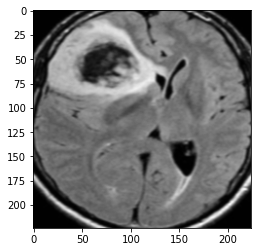

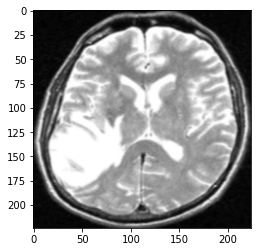

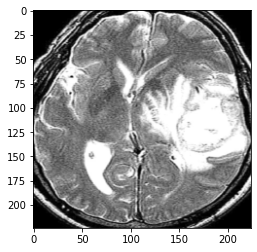

In [8]:
for p in format_yes[0:3]:
    pyplot.imshow(p, cmap='gray')
    pyplot.show()

In [9]:
try:
    os.mkdir(os.path.join('train_data'))
except FileExistsError:
    print("train_data exists")

try:
    os.mkdir(os.path.join('train_data', 'yes'))
except FileExistsError:
    print("train_data/yes exists")

try:
    os.mkdir(os.path.join('train_data', 'no'))
except FileExistsError:
    print("train_data/no exists")

train_data exists
train_data/yes exists
train_data/no exists


In [10]:
try:
    os.mkdir(os.path.join('test_data'))
except FileExistsError:
    print("test_data exists")

try:
    os.mkdir(os.path.join('test_data', 'yes'))
except FileExistsError:
    print("test_data/yes exists")

try:
    os.mkdir(os.path.join('test_data', 'no'))
except FileExistsError:
    print("test_data/no exists")

test_data exists
test_data/yes exists
test_data/no exists


In [11]:
random.seed(1)

# shuffle positives and negatives
random.shuffle(format_yes)
random.shuffle(format_no)

In [12]:
# random sample 150 positives and 150 negatives
TEST_N = 150

# write the images to their correct folders
for i, image in enumerate(format_no[0:TEST_N]):
    cv2.imwrite(os.path.join('test_data', 'no', str(i).zfill(5)+'_no_test.png'), image)

for i, image in enumerate(format_no[TEST_N:]):
    cv2.imwrite(os.path.join('train_data', 'no', str(i).zfill(5)+'_no.png'), image)

for i, image in enumerate(format_yes[0:TEST_N]):
    cv2.imwrite(os.path.join('test_data', 'yes', str(i).zfill(5)+'_yes_test.png'), image)

for i, image in enumerate(format_yes[TEST_N:]):
    cv2.imwrite(os.path.join('train_data', 'yes', str(i).zfill(5)+'_yes.png'), image)
